Support Vector Machine Classification

Dataset

In [19]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', data_home=r'./dataset/mnist', return_X_y= True, as_frame=False)
X.shape

(70000, 784)

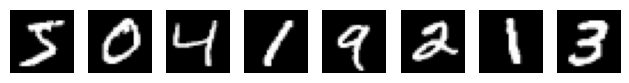

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

for pos, data in enumerate(X[:8], start=1):
    plt.subplot(1, 8, pos)
    plt.imshow(data.reshape((28, 28)),
               cmap=cm.Greys_r)
    plt.axis('off')
    pos += 1
plt.tight_layout()


In [21]:
y[:8]

array(['5', '0', '4', '1', '9', '2', '1', '3'], dtype=object)

Splitting Dataset

In [22]:
X_train = X[:1000]
y_train = y[:1000]
X_test = X[69000:]
y_test = y[69000:]

Training Model

In [23]:
from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [24]:
from sklearn.metrics import accuracy_score
yPred = model.predict(X_test)
score = accuracy_score(y_test, yPred)
print(f"Prediction Score: {score}")

Prediction Score: 0.917


Gridsearch

In [28]:
from sklearn.model_selection import GridSearchCV
param = {
    'kernel':['rbf', 'poly', 'sigmoid'],
    'C':[0.5, 1, 10, 100],
    'gamma':['scale', 1, 0.1, 0.01, 0.001]
}

gridSearch = GridSearchCV(SVC(random_state=42),
                          param_grid=param,
                          n_jobs=6,
                          verbose=1,
                          scoring="accuracy")

gridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=SVC(random_state=42), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [32]:
print(f"Best Grid Search Score: {gridSearch.best_score_}")
bestParam = gridSearch.best_estimator_.get_params()
print("Best Pramaters:")
for i in param:
    print(f"{i}: {bestParam[i]}")

Best Grid Search Score: 0.907
Best Pramaters:
kernel: rbf
C: 10
gamma: scale


Grid Search Evaluate

In [34]:
yPred2 = gridSearch.predict(X_test)
score2 = accuracy_score(y_test, yPred2)
print(f"Grid Search Prediction Score: {score2}")

Grid Search Prediction Score: 0.927
